In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# single variable

In [2]:
file=pd.read_csv('ex1data1.txt',names=['population','profit'])
file.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
file.insert(0,'x1',1)
file.head()

,x1,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [4]:
X=file.iloc[:,0:2]
X.shape
y=file.iloc[:,-1]
X=X.values
y=y.values

In [5]:
y=y.reshape((97,1))

### cost function 


In [6]:
alpha=0.01
def costFun(X,y,theta):
    inner=X@theta-y
    inner=np.power(inner,2)
    cost=np.sum(inner)/(2*len(y))
    return cost

### Gradient Descent

In [7]:
#initialization
theta=np.zeros((2,1))
cost=costFun(X,y,theta)
print(cost)

32.072733877455676


In [8]:
def gradi(X,y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        theta=theta-alpha*X.T@(X@theta-y)/len(y)
        cost=costFun(X,y,theta)
        costs.append(cost)
        if i%100==0:
            print('iteration:',i,'cost:',cost)
    return theta,costs

In [9]:
theta,costs=gradi(X,y,theta,0.02,1000)

iteration: 0 cost: 16.769642371667462
iteration: 100 cost: 5.170668092303259
iteration: 200 cost: 4.813840215803055
iteration: 300 cost: 4.640559602034057
iteration: 400 cost: 4.556412109403548
iteration: 500 cost: 4.5155489085988645
iteration: 600 cost: 4.495705166048674
iteration: 700 cost: 4.486068766778817
iteration: 800 cost: 4.481389196347322
iteration: 900 cost: 4.479116731414092


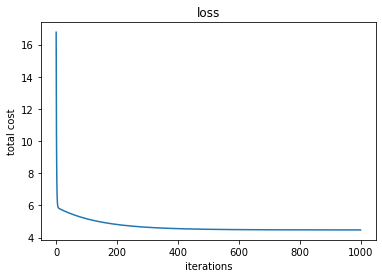

In [11]:
fig1=plt.plot(figsize=(7,7))

plt.plot(range(1000),costs)
plt.xlabel('iterations')
plt.ylabel('total cost')
plt.title('loss')
plt.show()

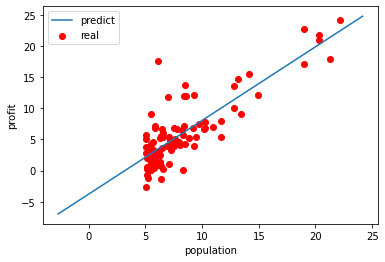

In [12]:
fig2=plt.plot(figsize=(7,7))
x=np.linspace(y.min(),y.max(),1000)
y_=theta[0,0]+theta[1,0]*x
plt.scatter(X[:,1],y,label='real',c='r')
plt.plot(x,y_,label='predict')
plt.legend()
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

# multiple variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('ex1data2.txt',names=['size','num of bed','price'])
data.head()

,size,num of bed,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### normalization!!!

In [8]:
def norm(X):
    x_norm=(X-X.mean())/X.std()
    return x_norm

In [9]:
data=norm(data)

In [10]:
data.insert(0,'x1',1)
data.head()

,x1,size,num of bed,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [11]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]
y.shape

(47,)

In [12]:
X=X.values
y=y.values

In [13]:
y=y.reshape((47,1))

### cost function

In [14]:
def costFun(X,y,theta):
    inner=np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(y))

In [15]:
theta=np.zeros((3,1))
cost=costFun(X,y,theta)

In [19]:
def gradi(X,y,theta,alpha,iters,iprint):
    costs=[]
    for i in range(iters):
        theta=theta-alpha*X.T@(X@theta-y)/len(y)
        cost=costFun(X,y,theta)
        costs.append(cost)
        if i%100==0:
            if iprint==True:
                print('iteration:',i,'cost',cost)
    return theta,costs

In [17]:
theta,costs=gradi(X,y,theta,0.02,1000)

iteration: 0 cost 0.47186307832380486
iteration: 100 cost 0.14769069097087112
iteration: 200 cost 0.13361260686272108
iteration: 300 cost 0.13120498443304696
iteration: 400 cost 0.1307783896412616
iteration: 500 cost 0.13070277225055463
iteration: 600 cost 0.1306893683909453
iteration: 700 cost 0.13068699243667858
iteration: 800 cost 0.13068657127748678
iteration: 900 cost 0.1306864966232447


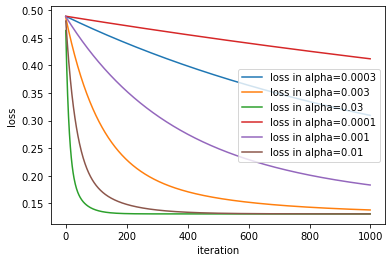

In [24]:
fig3=plt.plot(figsize=(10,10))
alpha=[0.0003,0.003,0.03,0.0001,0.001,0.01]
theta_=np.zeros((3,1))
for i in alpha:
    theta,costs=gradi(X,y,theta_,i,1000,False)
    plt.plot(range(1000),costs,label='loss in alpha={}'.format(i))
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()